In [4]:
from typing import Tuple, List

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from matplotlib.axes import Axes
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.pipeline import Pipeline

df: np.ndarray = pd.read_csv("https://raw.githubusercontent.com/JulienAlardot/ImmoElizaVisu/main/clean_database.csv",
                               index_col=0).values
X: np.ndarray = pd.DataFrame(df).drop(columns=[1]).values
y: np.ndarray = df[:, 1].flatten()
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

(70340, 29) (70340,)


In [6]:

params = {
{'random_state': 42, 'n_estimators': 393, 'max_depth': 5, 'learning_rate': 0.18096184030841525,
 'gamma': 0.6223292520026902, 'colsample_bytree': 0.6672209435032146}


# 0.87868669132923
# 0.7210963293130916

steps: List[Tuple] = [
    # ("imputer", KNNImputer(n_neighbors=10)),
    # ("reg", GradientBoostingRegressor(**params)),)
    ("reg", xgb.XGBRegressor(tree_method="gpu_hist", gpu_id=0, **params)),]

pipe: Pipeline = Pipeline(steps=steps)

pipe.fit(X_train, y_train)

Pipeline(steps=[('imputer', KNNImputer(n_neighbors=10)),
                ('reg',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=0.6338551950579786,
                              gamma=0.7983684048959909, gpu_id=0,
                              importance_type='gain',
                              interaction_constraints='',
                              learning_rate=0.19244881624366028,
                              max_delta_step=0, max_depth=4, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=372, n_jobs=8, num_parallel_tree=1,
                              random_state=42, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, subsample=1,
                              tree_method='gpu_hist', validate_parameters=1,
                              

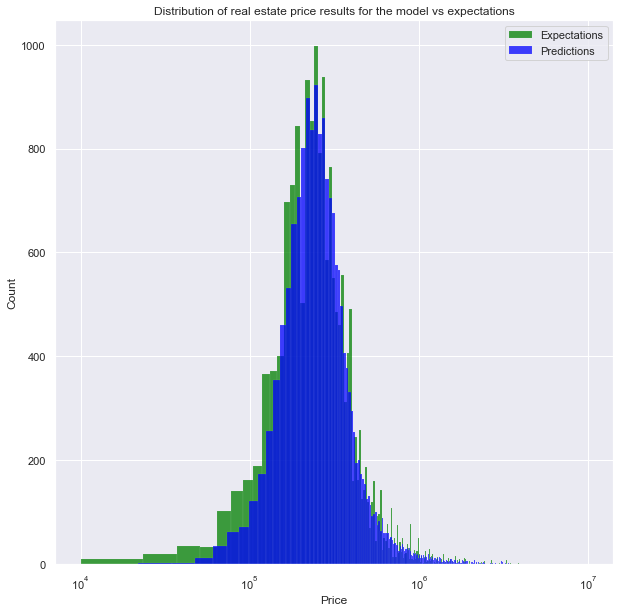

In [7]:
sns.set("notebook", style="darkgrid")
preds = pipe.predict(X_test)

results: pd.DataFrame = pd.DataFrame(np.array(list(zip(preds, y_test))), columns=("Predictions", "Expectations"))
results.sort_values("Predictions").reset_index(drop=True, inplace=True)

plt.figure(figsize=(10, 10), dpi=72)
sns.histplot(data=results["Expectations"], label="Expectations", color="Green")
sns.histplot(data=results["Predictions"], label="Predictions", color="Blue")
plt.xscale("log")
plt.xlabel("Price")
plt.title("Distribution of real estate price results for the model vs expectations")
plt.legend()

In [8]:
print(f"Training score: {pipe.score(X_train, y_train)}")
print(f"Test score: {pipe.score(X_test, y_test)}")

Training score: 0.8728306473999864
Test score: 0.7886444873001949


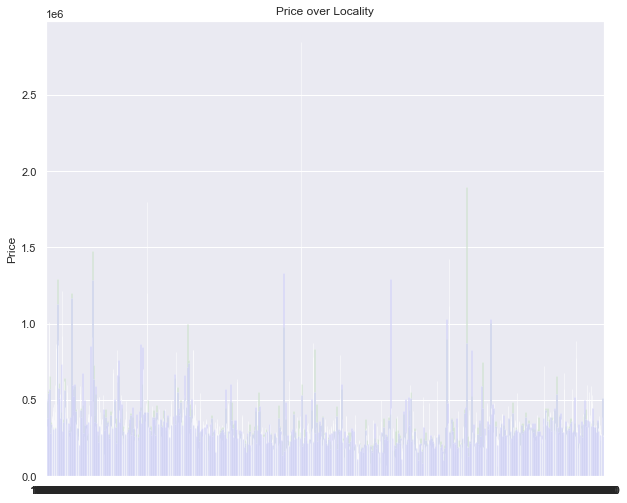

In [ ]:
fig: plt.Figure = plt.figure(figsize=(10, (X_train.shape[1] + 1) * 10), dpi=72)
gs: plt.GridSpec = fig.add_gridspec(X_train.shape[1] + 1, 1)
for i, column in enumerate(['Locality', 'Number of rooms', 'Area',
                            'Fully equipped kitchen', 'Furnished', 'Open fire', 'Terrace Area',
                            'Garden Area', 'Surface of the land',
                            'Surface area of the plot of land', 'Number of facades',
                            'Swimming pool', 'Source_logic-immo.be', 'Type of property_house',
                            'State of the building_new', 'State of the building_to renovate',
                            'Province_Brabant Wallon', 'Province_Brussels', 'Province_Hainaut',
                            'Province_Limburg', 'Province_Liège', 'Province_Luxembourg',
                            'Province_Namur', 'Province_Oost-Vlanderen', 'Province_Vlaams-Brabant',
                            'Province_West-Vlanderen', 'Region_Vlaams', 'Region_Wallonie']):
    ax: Axes = fig.add_subplot(gs[i])
    sns.barplot(x=X_test[:, i], y=y_test, color="green", estimator=np.mean, ci=None, label="Expectations", alpha=0.5,
    ax = ax)
    sns.barplot(x=X_test[:, i], y=preds, color="blue", estimator=np.mean, ci=None, label="Predictions", alpha=0.5,
    ax = ax)
    ax.set_title(f"Price over {column.replace('_', ' ').capitalize()}")
    ax.set_ylabel("Price")
    # ax.set_yscale("log")
    # if i in (1,2,7,9,):
    #     ax.set_xscale("log")
    ax.set_xlabel(column.replace('_', ' ').capitalize())
    ax.legend()